In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
%matplotlib inline

plt.style.use('ggplot')

In [4]:
vehicles_df = pd.read_csv('carsdataset.csv', encoding='ISO-8859-1')

In [5]:
vehicles_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
vehicles_df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [7]:
vehicles_df.isnull().mean()

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine Fuel Type     0.000252
Engine HP            0.005792
Engine Cylinders     0.002518
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.000504
Market Category      0.314084
Vehicle Size         0.000000
Vehicle Style        0.000000
highway MPG          0.000000
city mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64

In [8]:
new_vehicles_df = vehicles_df.loc[:, vehicles_df.isnull().mean() < 0.1]

new_vehicles_df.isnull().mean()

Make                 0.000000
Model                0.000000
Year                 0.000000
Engine Fuel Type     0.000252
Engine HP            0.005792
Engine Cylinders     0.002518
Transmission Type    0.000000
Driven_Wheels        0.000000
Number of Doors      0.000504
Vehicle Size         0.000000
Vehicle Style        0.000000
highway MPG          0.000000
city mpg             0.000000
Popularity           0.000000
MSRP                 0.000000
dtype: float64

In [9]:
new_vehicles_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [10]:
new_vehicles_df.shape

(11914, 15)

In [11]:
clean_vehicles_df = new_vehicles_df[['Make','Model','Year','Engine Fuel Type','Engine HP','Engine Cylinders',
                                     'Transmission Type','Driven_Wheels','Number of Doors','Vehicle Size','Vehicle Style',
                                    'highway MPG','city mpg','MSRP']]
clean_vehicles_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500


In [12]:
filtered_new_df = clean_vehicles_df.loc[(clean_vehicles_df['MSRP'] > 0)]

In [13]:
filtered_new_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500


Text(0.5, 0, 'Continuous Variable')

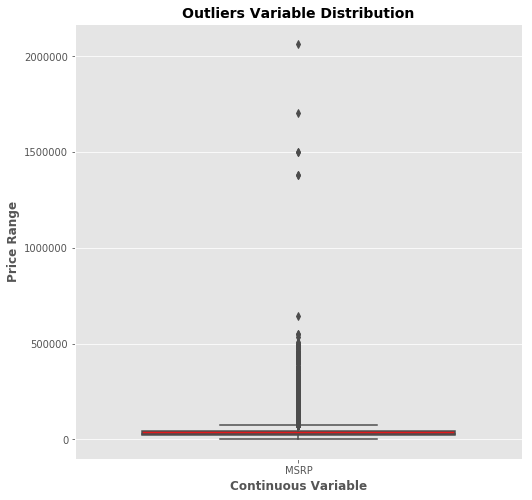

In [14]:
outliers = ['MSRP']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=filtered_new_df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

In [15]:
final_df = filtered_new_df.loc[(filtered_new_df['MSRP'] <= 500000)]

Text(0.5, 0, 'Continuous Variable')

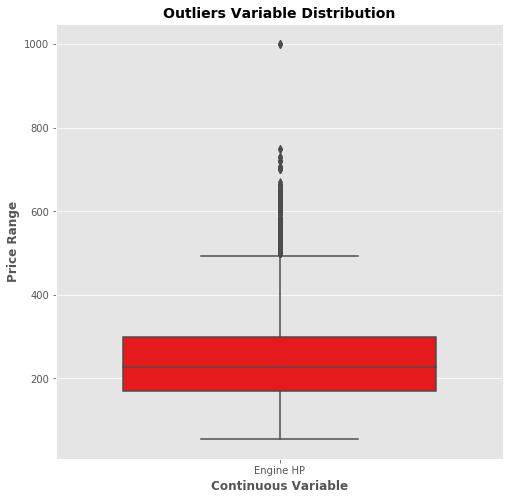

In [16]:
outliers = ['Engine HP']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=filtered_new_df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

In [17]:
final_df = final_df.loc[(filtered_new_df['Engine HP'] <= 800)]

In [18]:
final_df.shape

(11834, 14)

In [19]:
final_df.groupby('Make').count()['MSRP']

Make
Acura             252
Alfa Romeo          5
Aston Martin       93
Audi              328
BMW               334
Bentley            74
Buick             196
Cadillac          397
Chevrolet        1117
Chrysler          187
Dodge             626
FIAT               59
Ferrari            68
Ford              868
GMC               515
Genesis             3
HUMMER             17
Honda             447
Hyundai           303
Infiniti          330
Kia               226
Lamborghini        48
Land Rover        143
Lexus             202
Lincoln           156
Lotus              29
Maserati           58
Maybach            13
Mazda             423
McLaren             5
Mercedes-Benz     352
Mitsubishi        212
Nissan            548
Oldsmobile        150
Plymouth           82
Pontiac           186
Porsche           136
Rolls-Royce        31
Saab              111
Scion              60
Spyker              3
Subaru            256
Suzuki            351
Toyota            744
Volkswagen        809
Volvo

In [20]:
final_df.groupby('Make').mean()['MSRP']

Make
Acura             34887.587302
Alfa Romeo        61600.000000
Aston Martin     197910.376344
Audi              53452.112805
BMW               61546.763473
Bentley          247169.324324
Buick             28206.612245
Cadillac          56231.317380
Chevrolet         28292.137869
Chrysler          26722.962567
Dodge             22390.059105
FIAT              22206.016949
Ferrari          232261.323529
Ford              27393.420507
GMC               30493.299029
Genesis           46616.666667
HUMMER            36464.411765
Honda             26629.818792
Hyundai           24597.036304
Infiniti          42394.212121
Kia               25112.389381
Lamborghini      293925.000000
Land Rover        67823.216783
Lexus             47549.069307
Lincoln           42494.371795
Lotus             69188.275862
Maserati         114207.706897
Maybach          420792.307692
Mazda             20039.382979
McLaren          239805.000000
Mercedes-Benz     71537.809659
Mitsubishi        21232.259434
Nis

In [21]:
test_data_df = final_df

In [22]:
test_data_df.dropna(how='any', inplace=True)
test_data_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500


In [23]:
test_data_df.shape

(11801, 14)

In [24]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [31]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = test_data_df.columns.values.tolist()
for col in features:
    if test_data_df[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in test_data_df.columns:
        le = LabelEncoder()
        le.fit(list(test_data_df[col].astype(str).values))
        test_data_df[col] = le.transform(list(test_data_df[col].astype(str).values))

/Users/ianpearlstein/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [25]:
test_data_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500


In [26]:
df_dummy = pd.get_dummies(test_data_df,drop_first=True)

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11801 entries, 0 to 11913
Columns: 983 entries, Year to Vehicle Style_Wagon
dtypes: float64(3), int64(4), uint8(976)
memory usage: 11.7 MB


In [29]:
# Assign the data
df=df_dummy

# Set the target for the prediction
target='MSRP'

# set X and y
y = df[target]
X = df.drop(target, axis=1)
feature_names = X.columns

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [31]:
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9770271964783062

No handles with labels found to put in legend.


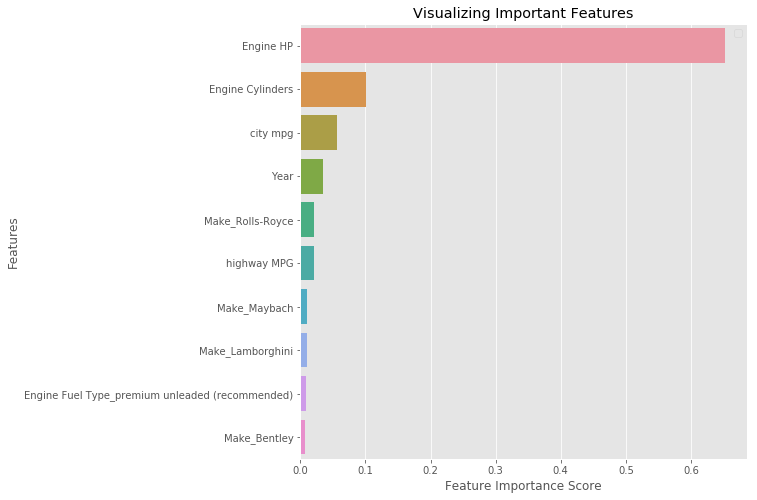

In [34]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top 10 features
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [35]:
test_data_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500


In [38]:
# RF without model and make

fil_test_data_df = test_data_df.drop('Make',axis=1)
filtered_test_data_df = fil_test_data_df.drop('Model',axis=1)
filtered_test_data_df.head()

,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500


In [39]:
fil_df_dummy = pd.get_dummies(filtered_test_data_df,drop_first=True)

# Assign the data
fil_df=fil_df_dummy

# Set the target for the prediction
target='MSRP'

# set X and y
y = fil_df[target]
X = fil_df.drop(target, axis=1)
feature_names = X.columns

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11801 entries, 0 to 11913
Data columns (total 39 columns):
Year                                                             11801 non-null int64
Engine HP                                                        11801 non-null float64
Engine Cylinders                                                 11801 non-null float64
Number of Doors                                                  11801 non-null float64
highway MPG                                                      11801 non-null int64
city mpg                                                         11801 non-null int64
MSRP                                                             11801 non-null int64
Engine Fuel Type_electric                                        11801 non-null uint8
Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)    11801 non-null uint8
Engine Fuel Type_flex-fuel (premium unleaded required/E85)       11801 non-null uint8
Engine Fuel Type_flex-fue

In [40]:
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9684909790718655

No handles with labels found to put in legend.


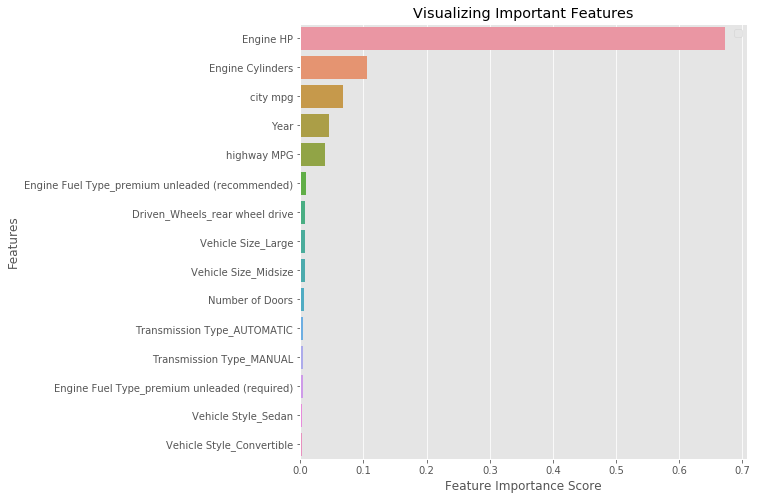

In [43]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top 11 features
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [28]:
# List of classification algorithms
algo_lst=['Logistic Regression',' K-Nearest Neighbors','Decision Trees','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst=[]

In [27]:
X = pd.get_dummies(test_data_df, dummy_na = False, columns=['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'] )
y = test_data_df['MSRP']
    
# Fill the null values with zeros
X.fillna(0, inplace=True)
y_unraveled = np.ravel(y)

In [29]:
X_train, X_test, Y_train, y_test = train_test_split(X, y_unraveled, test_size=0.10, random_state=32)

In [32]:
clf = RandomForestRegressor(n_estimators=200, max_features="sqrt")
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.9866829295516497

In [36]:
sig_cat_col = ['Make','Model','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type',
               'Driven_Wheels','Vehicle Size','Vehicle Style']

In [34]:
X = test_data_df
Y = test_data_df['MSRP']
Y_unraveled = np.ravel(Y)

In [37]:
data = pd.get_dummies(test_data_df, dummy_na = False, columns=sig_cat_col)
X.shape

(11801, 990)

In [38]:
target = test_data_df['MSRP']

In [39]:
data = test_data_df.drop('MSRP', axis=1)
feature_names = data.columns
data.head()

,Year,Number of Doors,highway MPG,city mpg,Make_Acura,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,2.0,26,19,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,2.0,28,19,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,2.0,28,20,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,2.0,28,18,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,2.0,28,18,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.10, random_state=32)

In [29]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.42929720575783237

In [30]:
rf = RandomForestRegressor(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.09090909090909091

In [31]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

NameError: name 'feature_names' is not defined